# Prevent Hotels Cancellations and No-Shows

![hotel-rooms-ga9098a2d8_1920](hotel-rooms-ga9098a2d8_1920.jpg)


### The Report is divided into following sections:
1. Introduction
2. Executive Summary
3. Data Understanding
-    Checking the shape of the dataframe
-    Generating an overview of the dataframe
-    Checking the data for null values
-    Checking if the rows are duplicated in the dataframe
4. Data Cleaning
5.  EDA
-  What factors affect whether customers cancel their booking?
-  Are cancellations more likely during weekends?
6.  Missing Value Imputation
7.  Model Building
8.  Comparing the models
9.  Recommendations


## Introduction

In the hospitality industry, one of the most common challenges faced by hotels is the high rate of cancellations from their guests. This can be a significant source of revenue loss for hotels and can also impact their reputation among customers. To address this issue, hotels are now turning towards data science to help them identify the factors that contribute to cancellations and to find ways to reduce them. In this scenario, you have been tasked with supporting a hotel with a project aimed at increasing revenue from their room bookings by reducing cancellations. The goal of this project is to use data science to identify what factors contribute to whether a booking will be fulfilled or cancelled, and to provide actionable insights that the hotel can use to reduce the chance that someone cancels their booking. This project requires a comprehensive approach that involves analyzing a variety of data sources, identifying patterns and trends, and using appropriate statistical and machine learning techniques to uncover the underlying factors that contribute to cancellations.

##  Executive Summary

We are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where we come in! They have asked us to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of our work to reduce the chance someone cancels their booking.

To achieve these objectives, we have prepared a report covering the following:
1.  What factors affect whether customers cancel their booking?
2. Are cancellations more likely during weekends?
3. Which general recommendations for the hotel can you make?

### The results:

The report begins with a brief overview and cleaning of the data, followed by an explanation of the methodologies employed to extract the most valuable insights. The exploratory data analysis has indicated that:

1. The factors affecting whether customers cancel their bookings are:

-  Hotel reservations with zero children have the lowest cancellation rate, 
   while reservations with two children have the highest cancellation rate.     
-  The cancellation percentage is positively correlated with the number of weekend nights.
-  The cancellation rate is lowest when the number of weeknights booked in the hotel is one. 
-  The cancellation rate is lowest in January and highest in July.
-  The median lead time value for the non-cancelled booking is much lower
       than the median value for the cancelled booking.

2. Cancellations are more likely during weekends. 
    - Weekday bookings have a 32% cancellation rate, while weekend bookings have a 35% cancellation rate.
    - The chi-square test of independence is used to determine if booking status is affected by weekend reservations. There is a statistically significant relationship between booking status and weekend reservations.




## Data Understanding
1.    Checking the shape of the dataframe
2.    Generate an overview of the dataframe
3. Checking the data for null values
4. Check if the rows are duplicated in the dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

plt.style.use('ggplot')
hotels = pd.read_csv("data/hotel_bookings.csv")
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [2]:
hotels.shape


(36275, 19)

In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [4]:
hotels.isnull().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

#### Validing that null entries in the row shouldn't be greater than _80%_

In [5]:
hotels[hotels.isnull().sum(axis=1)>=17]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled


In [6]:
hotels= hotels.drop(hotels[hotels.isnull().sum(axis=1)>=17].index)
hotels.shape

(36274, 19)

We have dropped the first row from the dataframe as 17 out of 19 columns have missing values.

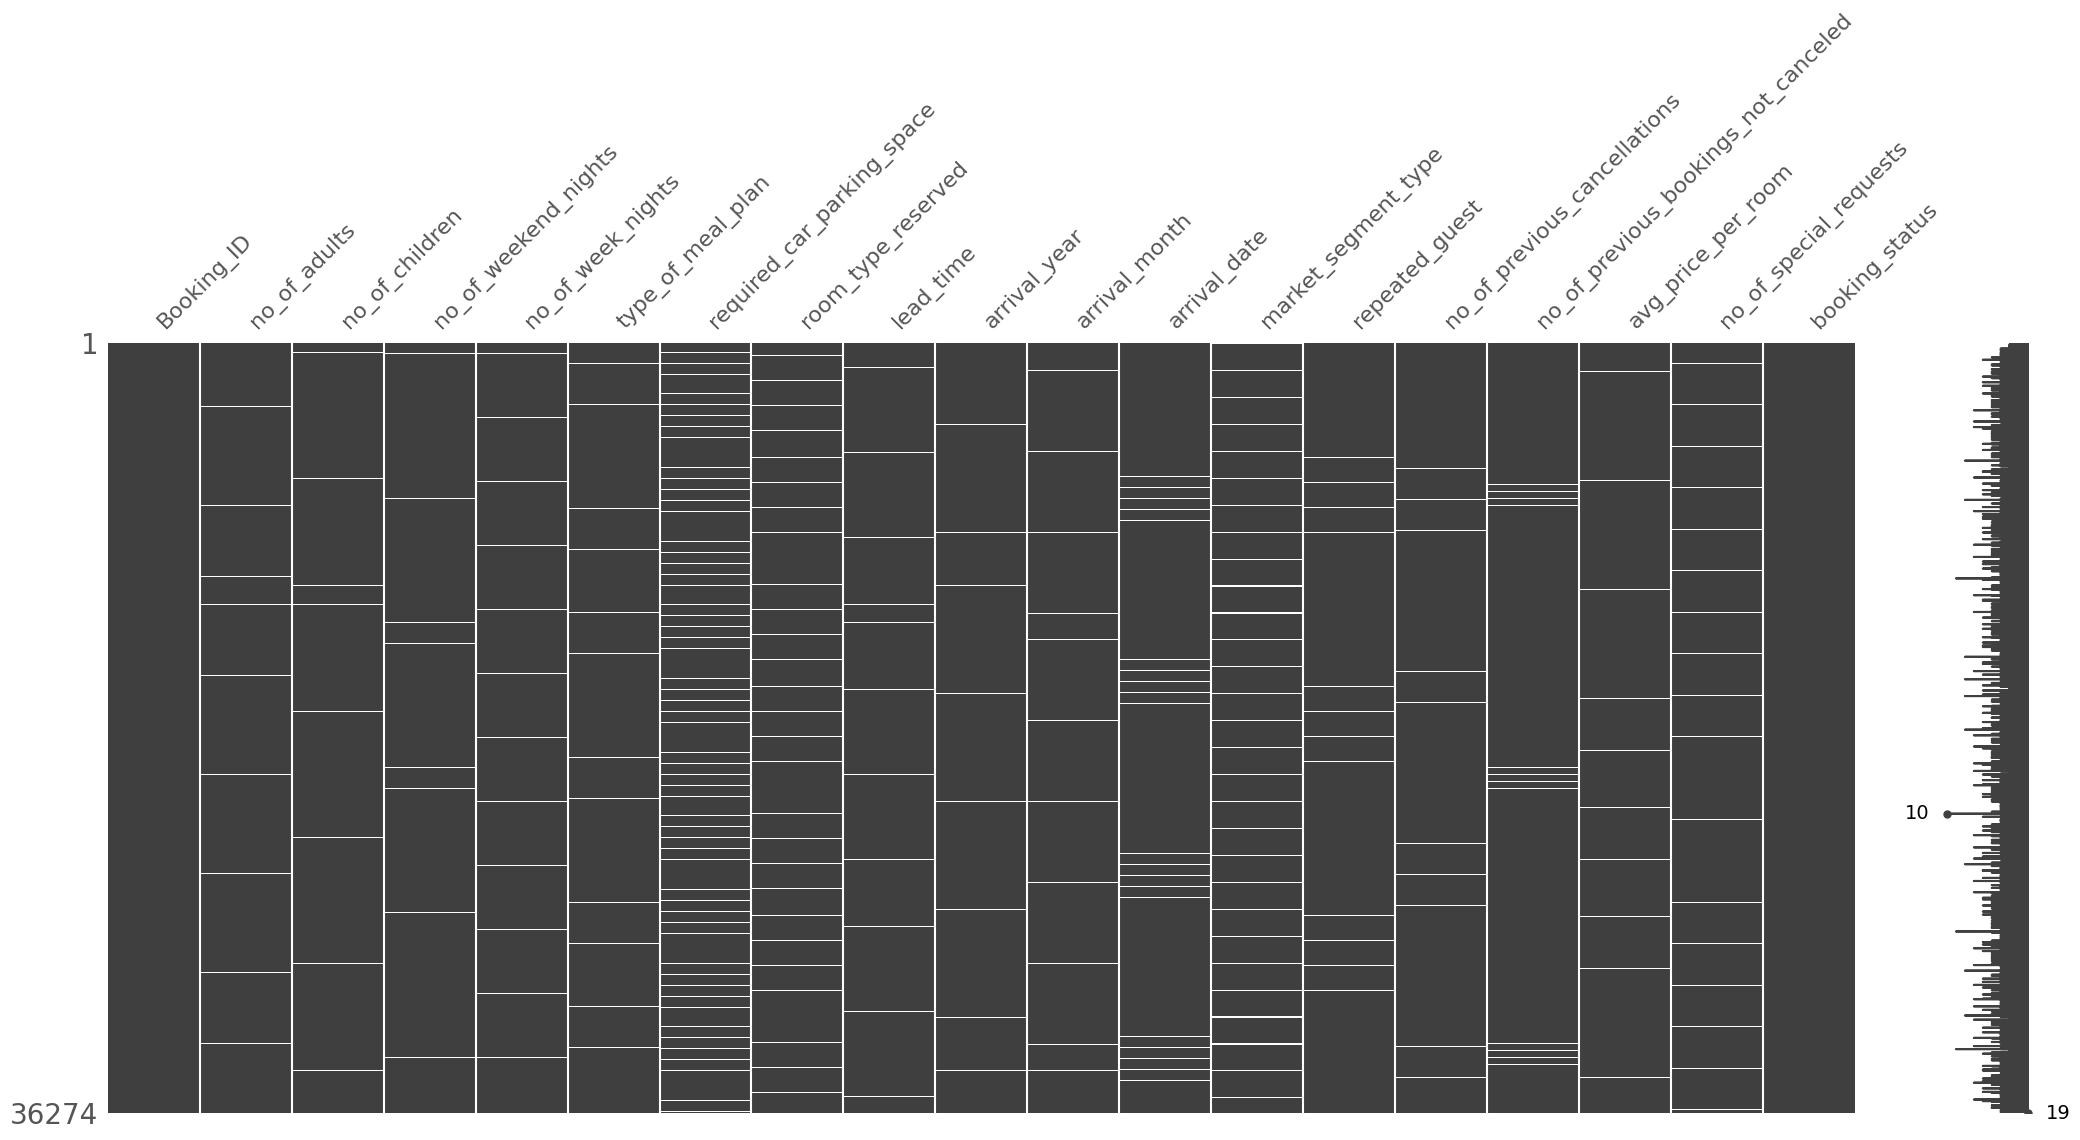

In [7]:
msno.matrix(hotels)
plt.show()

We can see that the column 'required_car_parking_space' has the most absent entries, followed by the column 'market_segment_type'.

In [8]:
hotels.duplicated().sum()


0

## Data Cleaning
 

In [9]:
hotels["total_guest"] = hotels["no_of_adults"]+hotels["no_of_children"]
hotels["total_night_booked"] = hotels["no_of_weekend_nights"]+hotels["no_of_week_nights"]

#### Total count of people in the hotel room shouldn't be zero

In [10]:
hotels[hotels['total_guest'] == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guest,total_night_booked


#### Nights booked shouldn't be zero

In [11]:
hotels[hotels["total_night_booked"] == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guest,total_night_booked
209,INN00210,1.0,0.0,0.0,0.0,Meal Plan 1,0.0,Room_Type 1,4.0,2018.0,2.0,27.0,Complementary,0.0,0.0,0.0,0.0,1.0,Not_Canceled,1.0,0.0
1158,INN01159,2.0,0.0,0.0,0.0,Meal Plan 1,0.0,Room_Type 1,145.0,2018.0,7.0,5.0,Online,0.0,0.0,0.0,0.0,1.0,Not_Canceled,2.0,0.0
1403,INN01404,3.0,0.0,0.0,0.0,Meal Plan 1,0.0,Room_Type 4,57.0,2018.0,4.0,1.0,Online,0.0,0.0,0.0,0.0,2.0,Not_Canceled,3.0,0.0
1907,INN01908,2.0,0.0,0.0,0.0,Meal Plan 2,0.0,Room_Type 1,247.0,2018.0,6.0,6.0,Online,0.0,0.0,0.0,0.0,1.0,Not_Canceled,2.0,0.0
1986,INN01987,2.0,0.0,0.0,0.0,Meal Plan 1,0.0,Room_Type 1,43.0,2017.0,10.0,17.0,Online,0.0,0.0,0.0,0.0,1.0,Not_Canceled,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33218,INN33219,1.0,0.0,0.0,0.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,6.0,Online,0.0,0.0,0.0,0.0,0.0,Not_Canceled,1.0,0.0
33537,INN33538,2.0,0.0,0.0,0.0,Meal Plan 1,0.0,Room_Type 2,166.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,0.0,2.0,Not_Canceled,2.0,0.0
34750,INN34751,1.0,0.0,0.0,0.0,Meal Plan 1,0.0,Room_Type 4,1.0,2017.0,10.0,22.0,Complementary,0.0,0.0,0.0,0.0,0.0,Not_Canceled,1.0,0.0
35472,INN35473,1.0,0.0,0.0,0.0,Meal Plan 1,0.0,Room_Type 1,7.0,2018.0,2.0,15.0,NaN,0.0,0.0,0.0,0.0,0.0,Not_Canceled,1.0,0.0


In [12]:
hotels = hotels.drop(hotels[hotels["total_night_booked"] == 0].index)
hotels.shape

(36199, 21)

#### Average price per room shouldn't be zero

In [13]:
hotels[hotels["avg_price_per_room"] == 0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guest,total_night_booked
63,INN00064,1.0,0.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 1,2.0,2017.0,9.0,10.0,Complementary,0.0,0.0,0.0,0.0,1.0,Not_Canceled,1.0,1.0
145,INN00146,1.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,13.0,2018.0,6.0,1.0,Complementary,1.0,3.0,5.0,0.0,1.0,Not_Canceled,1.0,2.0
266,INN00267,1.0,0.0,0.0,2.0,Meal Plan 1,NaN,Room_Type 1,1.0,2017.0,8.0,12.0,Complementary,1.0,0.0,1.0,0.0,1.0,Not_Canceled,1.0,2.0
267,INN00268,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,4.0,2017.0,8.0,23.0,Complementary,0.0,0.0,0.0,0.0,1.0,Not_Canceled,1.0,3.0
288,INN00289,2.0,0.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 2,9.0,NaN,NaN,7.0,NaN,1.0,0.0,3.0,0.0,1.0,Not_Canceled,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1.0,0.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 7,0.0,2018.0,6.0,7.0,Complementary,1.0,4.0,17.0,0.0,1.0,Not_Canceled,1.0,1.0
36080,INN36081,NaN,0.0,1.0,1.0,Meal Plan 1,0.0,Room_Type 7,0.0,2018.0,3.0,21.0,Complementary,1.0,3.0,15.0,0.0,1.0,Not_Canceled,NaN,2.0
36114,INN36115,1.0,0.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,3.0,2.0,Online,0.0,0.0,0.0,0.0,0.0,Not_Canceled,1.0,1.0
36217,INN36218,2.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 2,3.0,2017.0,8.0,9.0,Online,0.0,0.0,0.0,0.0,2.0,Not_Canceled,2.0,3.0


In [14]:
hotels['avg_price_per_room'] =  np.where(hotels['avg_price_per_room'] == 0,"NaN",hotels['avg_price_per_room']).astype(float)

#### Insights

- We can see that nights booked are zero for 75 rows and for those records even the average price per room is zero. We have dropped these rows as these rows will not add value to our analysis.
- For 465 rows, the average price per apartment is $0. As these are the significant number of rows, we are not dropping them. We prefer to substitute them with null values.

## Exploratory Data Analysis

### Univariate Data Analysis

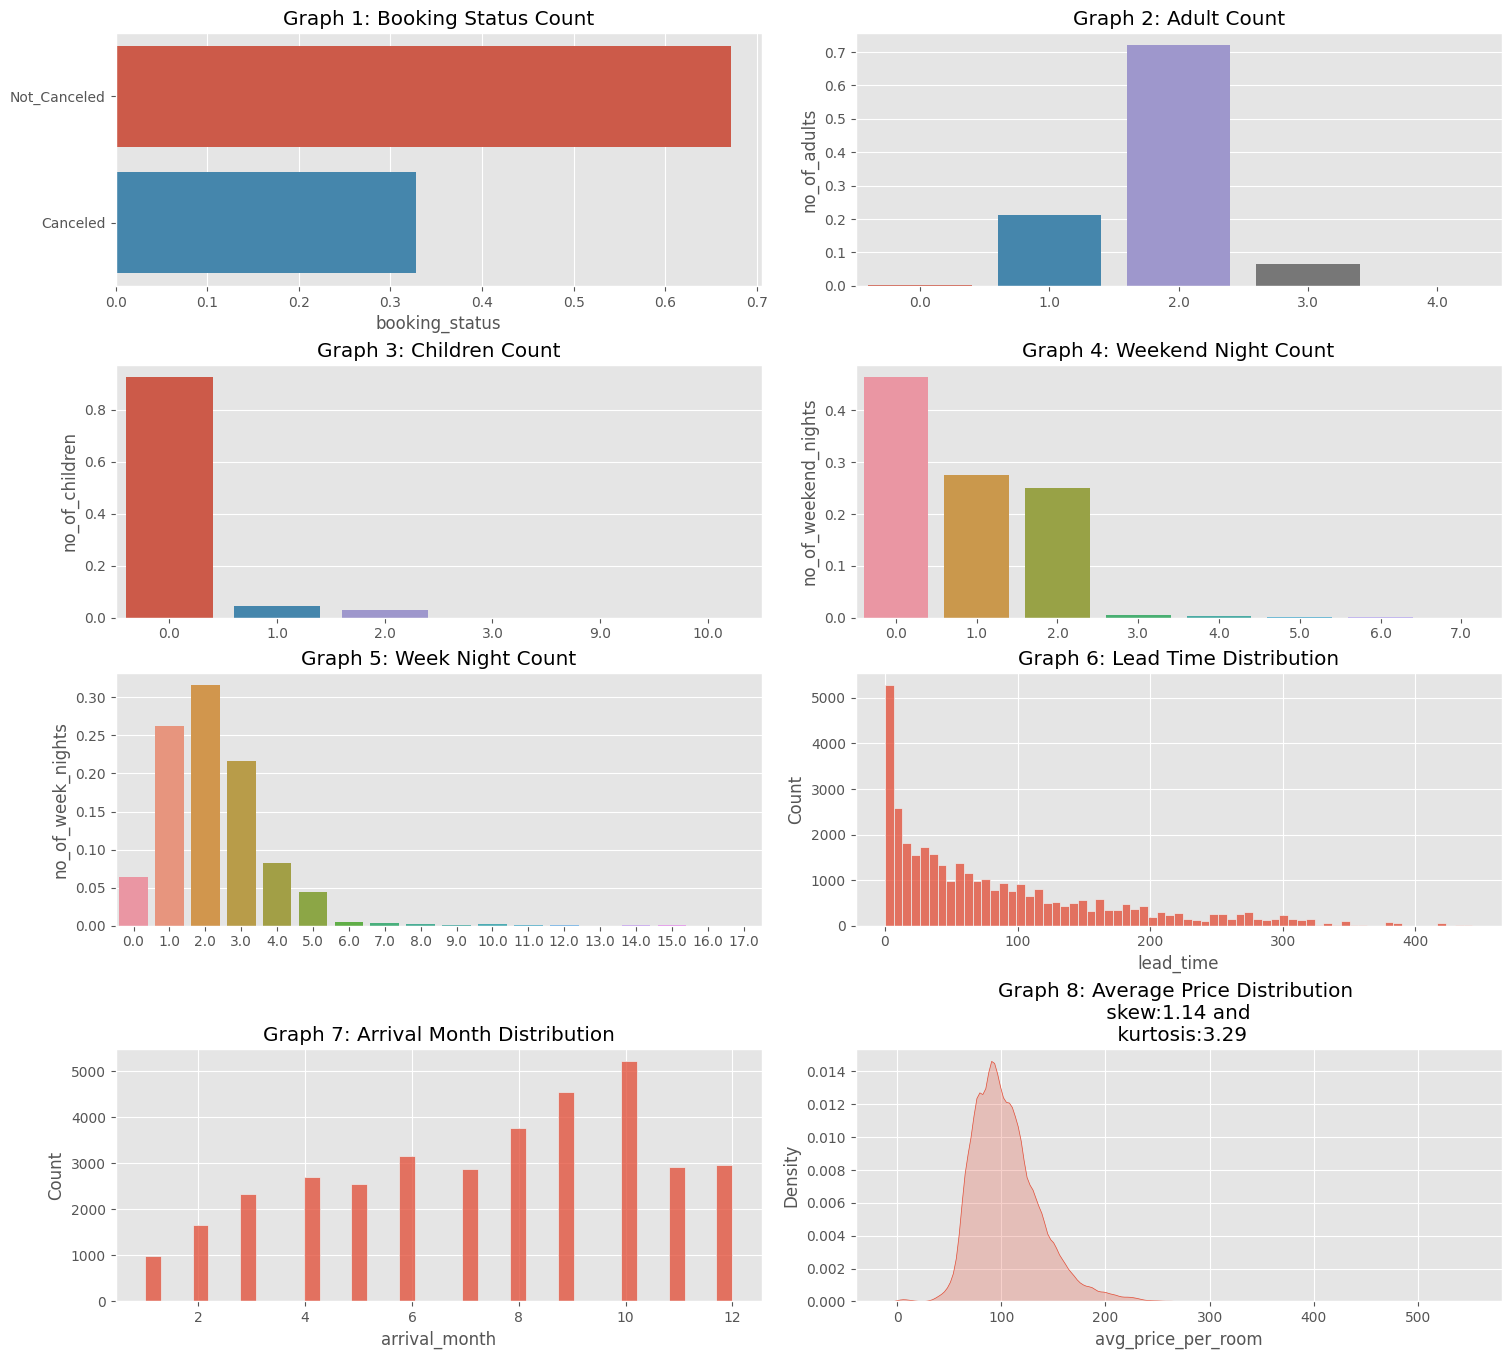

In [15]:
norm_count_booking_status = hotels["booking_status"].value_counts(normalize=True)
norm_count_adults = hotels["no_of_adults"].value_counts(normalize=True)
norm_count_children = hotels["no_of_children"].value_counts(normalize=True)
norm_count_weekend_night = hotels["no_of_weekend_nights"].value_counts(normalize=True)
norm_count_week_night = hotels["no_of_week_nights"].value_counts(normalize=True)

fig = plt.figure(figsize=(15, 16), constrained_layout=True)
spec = fig.add_gridspec(5, 2)
ax0 = fig.add_subplot(spec[0, 0])

## Analyzing the distribution of the target variable- booking_status
sns.barplot(x=norm_count_booking_status,y=norm_count_booking_status.index,ax=ax0).set(title='Graph 1: Booking Status Count')
ax1 = fig.add_subplot(spec[0, 1])

## Analyzing the distribution of adult count
sns.barplot(x=norm_count_adults.index,y=norm_count_adults ,ax=ax1).set(title='Graph 2: Adult Count')
ax2 = fig.add_subplot(spec[1, 0])

## Analyzing the distribution of children count
sns.barplot(x=norm_count_children.index,y=norm_count_children,ax=ax2).set(title='Graph 3: Children Count')
ax3 = fig.add_subplot(spec[1, 1])

## Analyzing the booking count over weekend
sns.barplot(x=norm_count_weekend_night.index,y=norm_count_weekend_night,ax=ax3).set(title='Graph 4: Weekend Night Count')
ax4 = fig.add_subplot(spec[2, 0])

## Analyzing the booking count over weekdays
sns.barplot(x=norm_count_week_night.index,y=norm_count_week_night,ax=ax4).set(title='Graph 5: Week Night Count')
ax5 = fig.add_subplot(spec[2, 1])

## Analyzing the distribution of lead time
sns.histplot(x= 'lead_time',data=hotels,ax=ax5).set(title='Graph 6: Lead Time Distribution')
ax6 = fig.add_subplot(spec[3, 0])

## Analyzing the reservation in different months
sns.histplot(x= 'arrival_month',data=hotels,ax=ax6).set(title='Graph 7: Arrival Month Distribution')
ax7 = fig.add_subplot(spec[3, 1])

## Analyzing the distribution of average price
skew = hotels['avg_price_per_room'].skew()
kurt = hotels['avg_price_per_room'].kurtosis()
sns.kdeplot(x='avg_price_per_room',data=hotels,ax=ax7,shade=True).set(title='Graph 8: Average Price Distribution \n skew:{} and \n kurtosis:{}'.format(round(skew,2),round(kurt,2)))


plt.show()

### Insights:
- **Graph 1:** About 67% of the bookings made are not cancelled and 33% bookings are cancelled.
- **Graph 2:** Around 70% of the hotel bookings have 2 adults.
- **Graph 3:** More than 80% of the hotel bookings have no children.
- **Graph 4:** Around 45% of the hotel bookings have weekend night count as 0 and 29% of the hotel bookings have weekend night count as 1.
- **Graph 5:** There are maximum hotel bookings with week night count as 2.
- **Graph 6:** Lead time distribution is right skewed.
- **Graph 7:** Maximum bookings are made for the month of October followed by September.
- **Graph 8:** The average price distribution graph is slightly right skewed.


## What factors affect whether customers cancel their booking?

### Is the hotel room cancellation dependent on the number of children?

In [16]:
def plot_percentage_cancellation(percent_cancelled,title,xlabel):
    fig = plt.figure(figsize=(6, 4), constrained_layout=True)
    percentage = percent_cancelled*100
    ax = percentage.round()[:,'Canceled'].plot(kind='bar')
    ax.set_ylabel('Percent')
    ax.set_xlabel(xlabel)
    ax.bar_label(ax.containers[0])
    ax.set_title(title)
    plt.show()

In [17]:
from scipy.stats import chi2_contingency

def ch_relation_cat_test(target,cat_var,df):
    observed_freq_cat= pd.crosstab(df[target],df[cat_var])
    chi2, pvalue, dof, ex = chi2_contingency(observed_freq_cat)
    if pvalue < 0.05:
        print(f"Rejecting a null hypothesis. There is a statistically significant relationship between the target variable {target} and {cat_var}. The pvalue is {pvalue}")
    else:
        print(f"Accepting a null hypothesis. There is no relationship between the target variables {target} and {cat_var}. The pvalue is {pvalue}")

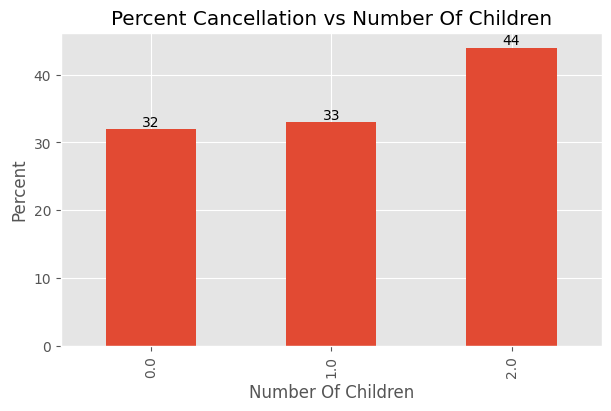

In [18]:
## For the analysis, we used a children count of less than 3 because reservations with a children count larger than or equal to 3 account for fewer than 1% of all bookings.

hotels_updated = hotels[hotels.no_of_children <3]
percent_cancelled = hotels_updated.groupby('no_of_children')['booking_status'].value_counts(normalize=True)
plot_percentage_cancellation(percent_cancelled,'Percent Cancellation vs Number Of Children','Number Of Children')

By looking at the above plot, there seems to be a relationship between "Number Of Children" and "Cancellation Percentage". We can validate this further by using **chi-square test of independence**.

-      Ha: There is a relationship between no_of_children & booking_status
-      Hnull : There is no relationship between no_of_children & booking_status

In [19]:
ch_relation_cat_test('booking_status','no_of_children',hotels_updated)

Rejecting a null hypothesis. There is a statistically significant relationship between the target variable booking_status and no_of_children. The pvalue is 4.4571018983892107e-13


#### Insights:
-   Hotel reservations with zero children have the lowest cancellation rate, while reservations with two children have the highest cancellation rate. The hotel should take more reservations with no children because the cancellation rate for those reservations is substantially lower. 
-  The chi-square test result is below the threshold value, this suggests that there is a significant statistical relationship between the booking status and number of children.

### Is the hotel room cancellation rate affected by the number of weekend nights?

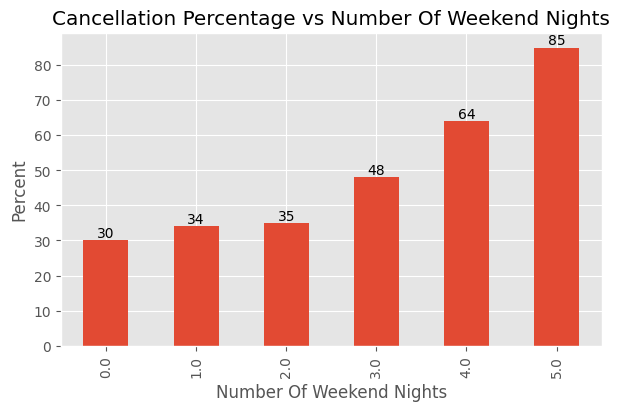

In [20]:
## For the analysis, we used a weekend night count of less than 6 because reservations with a weekend night count larger than or equal to 6 account for fewer than 20 bookings.

hotels_updated_weekend = hotels[hotels.no_of_weekend_nights <6]
percent_cancelled_weekend = hotels_updated_weekend.groupby('no_of_weekend_nights')['booking_status'].value_counts(normalize=True)
plot_percentage_cancellation(percent_cancelled_weekend,'Cancellation Percentage vs Number Of Weekend Nights','Number Of Weekend Nights')

By looking at the above plot, we can say that the cancellation percentage is positively correlated with the number of weekend nights. Is this due to random chance, or is it statistically significant? We would validate it by running the chi-square test of independence.

-      Ha: There is a relationship between no_of_weekend_nights & booking_status
-      Hnull : There is no relationship between no_of_weekend_nights & booking_status

In [21]:
ch_relation_cat_test('booking_status','no_of_weekend_nights',hotels_updated_weekend)

Rejecting a null hypothesis. There is a statistically significant relationship between the target variable booking_status and no_of_weekend_nights. The pvalue is 2.255964567733299e-39


### Insights
- The percentage of cancellations is proportional to the number of weekend nights booked in the hotel room. The more weekend nights booked, the greater the likelihood of cancellation.
-  The chi-square test result is less than the threshold value, indicating that there is a statistically significant association between the booking status and the number of weekend nights.


### Is the hotel room cancellation rate affected by the number of week nights?

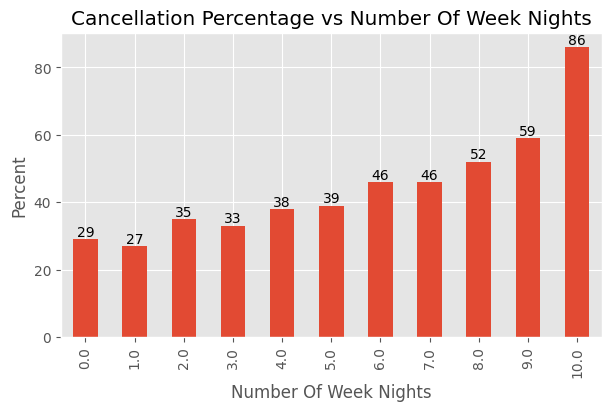

In [22]:
## For the analysis, we used a week night count of less than 11 because reservations with a week night count larger than or equal to 11 account for fewer than 20 bookings.

hotels_updated_week= hotels[hotels.no_of_week_nights <11]
percent_cancelled_week = hotels_updated_week.groupby('no_of_week_nights')['booking_status'].value_counts(normalize=True)
plot_percentage_cancellation(percent_cancelled_week,'Cancellation Percentage vs Number Of Week Nights','Number Of Week Nights')


Based on the above plot, we can conclude that the cancellation rate is lowest when the number of weeknights booked in the hotel is one, and greatest when the number of weeknights booked in the hotel is ten.


In [23]:
ch_relation_cat_test('booking_status','no_of_week_nights',hotels_updated_week)

Rejecting a null hypothesis. There is a statistically significant relationship between the target variable booking_status and no_of_week_nights. The pvalue is 9.29499648276829e-73


### Insights
- The percentage of cancellations is mostly proportional to the number of week nights booked in the hotel room. The more week nights booked, the greater the likelihood of cancellation. 
-  The chi-square test result is less than the threshold value, indicating that there is a statistically significant association between the booking status and the number of week nights.

 ### Is the hotel room cancellation dependent on the number of adults?

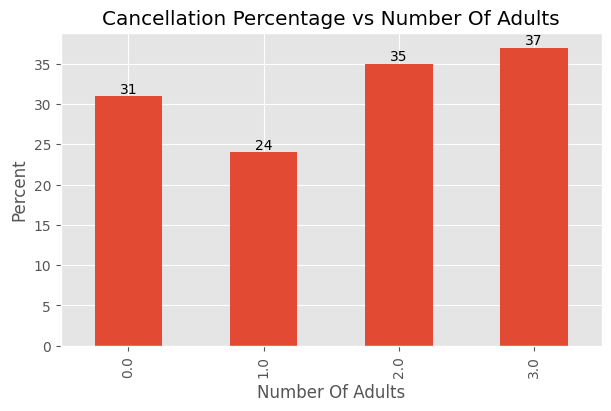

In [24]:
## For the analysis, we used an adult count of less than 4 because reservations with an adult count of 4 account for fewer than 20 bookings.

hotels_updated_adult= hotels[hotels.no_of_adults <4]
percent_cancelled_adult = hotels_updated_adult.groupby('no_of_adults')['booking_status'].value_counts(normalize=True)
plot_percentage_cancellation(percent_cancelled_adult,'Cancellation Percentage vs Number Of Adults','Number Of Adults')



Based on the above plot, we can say that the cancellation rate is lowest when bookings are made for 1 adult and highest when bookings are made for 3 adults.

In [25]:
ch_relation_cat_test('booking_status','no_of_adults',hotels_updated_adult)

Rejecting a null hypothesis. There is a statistically significant relationship between the target variable booking_status and no_of_adults. The pvalue is 2.309510100105259e-71


### Insights
 The cancellation rate is lowest for a single adult hotel booking.The chi-square test p-value is less than a threshold value indicating that there is a statistically significant association between the booking status and the number of adults.

### Is the hotel room cancellation dependent on the number of arrival month?

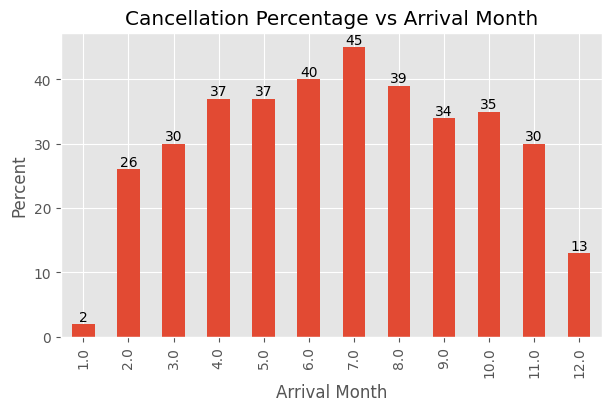

In [26]:
percentage_month= hotels.groupby('arrival_month')['booking_status'].value_counts(normalize=True)
plot_percentage_cancellation(percentage_month,'Cancellation Percentage vs Arrival Month','Arrival Month')

In [27]:
ch_relation_cat_test('booking_status','arrival_month',hotels)

Rejecting a null hypothesis. There is a statistically significant relationship between the target variable booking_status and arrival_month. The pvalue is 2.4961781351198217e-291


### Insights:

-  The cancellation rate is lowest in January and highest in July.
-  The chi-square independence test revealed a statistically significant association between booking status and arrival month.

### Is the booking status dependent on the lead time?

[Text(0.5, 1.0, 'Booking Status vs Lead Time')]

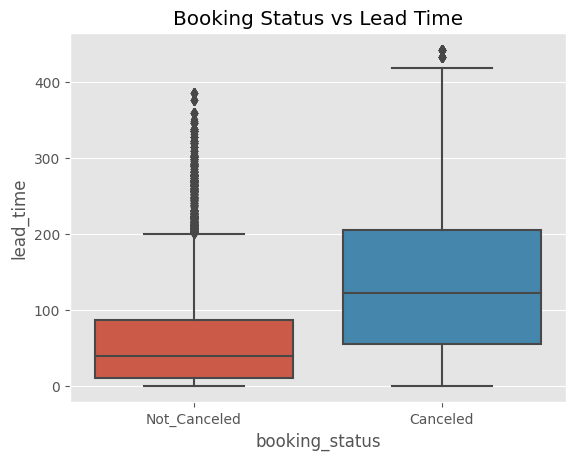

In [28]:
sns.boxplot(x='booking_status',y='lead_time',data=hotels).set(title = "Booking Status vs Lead Time")

### Insights

-  From the above plot, we can see that the booking status is dependent on the lead time.
-  The median lead time value for the non-cancelled booking is much lower than the median value for the cancelled booking.

## Are cancellations dependent on market segment type?

<AxesSubplot: xlabel='market_segment_type'>

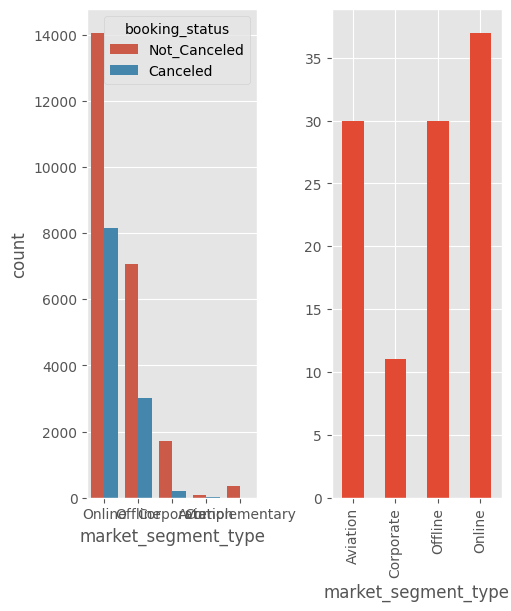

In [29]:
fig = plt.figure(figsize=(5, 6), constrained_layout=True)
spec = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(spec[0, 0])
sns.countplot(x='market_segment_type',hue='booking_status',data=hotels,ax=ax0)
ax1 = fig.add_subplot(spec[0, 1])
market_cancel_perc = hotels.groupby('market_segment_type')['booking_status'].value_counts(normalize=True)
percentage = market_cancel_perc*100
percentage.round()[:,'Canceled'].plot(kind='bar')

## Are cancellations more likely during weekends?

In [30]:
df = pd.DataFrame({'year': hotels['arrival_year'],
                   'month': hotels['arrival_month'],
                   'day': hotels['arrival_date']})
arrival_datetime = pd.to_datetime(df,errors='coerce')
hotels['is_weekend']= arrival_datetime.dt.day_name().map(lambda x: True if x in ['Saturday','Sunday'] else False)


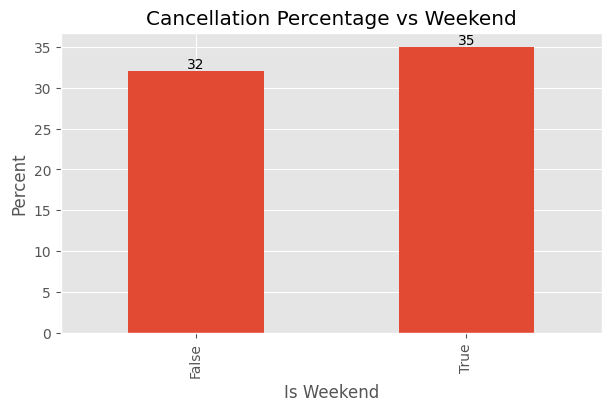

In [31]:
weekend_cancel_perc = hotels.groupby('is_weekend')['booking_status'].value_counts(normalize=True)
plot_percentage_cancellation(weekend_cancel_perc,'Cancellation Percentage vs Weekend','Is Weekend')


Based on the above plot, we can say that cancellations are more likely during weekend. We would validate is by running the chi-square test of independence.

-      Ha: There is a relationship between variables "Is Weekend" & "booking_status"
-      Hnull : There is no relationship between variables "Is Weekend" & "booking_status"



In [32]:
ch_relation_cat_test('booking_status','is_weekend',hotels)


Rejecting a null hypothesis. There is a statistically significant relationship between the target variable booking_status and is_weekend. The pvalue is 2.421654061517141e-08


### Insights:

 - Weekday bookings have a 32% cancellation rate, while weekend bookings have a 35% cancellation rate.
 - The chi-square test of independence is used to determine if booking status is affected by weekend reservations. There is a statistically significant relationship between booking status and weekend reservations.

#### Impute missing values for lead_time and average price

In [33]:

hotels['lead_time'] = hotels['lead_time'].fillna(hotels['lead_time'].median())
hotels['avg_price_per_room'] = hotels['avg_price_per_room'].fillna(hotels['avg_price_per_room'].median())
print(hotels['avg_price_per_room'].isna().sum())
print(hotels['lead_time'].isna().sum())



0
0


## Model Building

In [34]:
hotels["is_weekend"] = hotels["is_weekend"].astype(int)
hotels['booking_status'] = hotels['booking_status'].map({'Not_Canceled':0,'Canceled':1})
X = hotels.drop(['booking_status','Booking_ID'],axis=1)
y= hotels['booking_status']

In [35]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_guest,total_night_booked,is_weekend
1,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,2.0,5.0,0
2,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,1.0,3.0,0
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,2.0,2.0,1
4,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,2.0,2.0,0
5,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018.0,9.0,13.0,Online,0.0,0.0,0.0,115.00,1.0,2.0,2.0,0


In [36]:
X.shape

(36199, 20)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
features_num = [
    "no_of_adults", "no_of_children",
    "no_of_weekend_nights","no_of_week_nights","required_car_parking_space",
    "arrival_year","arrival_month","arrival_date",
    "repeated_guest","no_of_previous_cancellations","no_of_previous_bookings_not_canceled",
    "no_of_special_requests","total_guest","total_night_booked","is_weekend"
]
feature_string = ["type_of_meal_plan","room_type_reserved","market_segment_type"]

transformer_num = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    
)
transformer_string = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_string,feature_string)
)

X_train, X_test, y_train, y_test= \
    train_test_split(X, y, train_size=0.70,random_state=2,stratify=y)

X_train= preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
input_shape= X_train.shape[1]
print(input_shape)
print(preprocessor.get_feature_names_out())



31
['pipeline-1__no_of_adults' 'pipeline-1__no_of_children'
 'pipeline-1__no_of_weekend_nights' 'pipeline-1__no_of_week_nights'
 'pipeline-1__required_car_parking_space' 'pipeline-1__arrival_year'
 'pipeline-1__arrival_month' 'pipeline-1__arrival_date'
 'pipeline-1__repeated_guest' 'pipeline-1__no_of_previous_cancellations'
 'pipeline-1__no_of_previous_bookings_not_canceled'
 'pipeline-1__no_of_special_requests' 'pipeline-1__total_guest'
 'pipeline-1__total_night_booked' 'pipeline-1__is_weekend'
 'pipeline-2__type_of_meal_plan_Meal Plan 1'
 'pipeline-2__type_of_meal_plan_Meal Plan 2'
 'pipeline-2__type_of_meal_plan_Meal Plan 3'
 'pipeline-2__type_of_meal_plan_Not Selected'
 'pipeline-2__room_type_reserved_Room_Type 1'
 'pipeline-2__room_type_reserved_Room_Type 2'
 'pipeline-2__room_type_reserved_Room_Type 3'
 'pipeline-2__room_type_reserved_Room_Type 4'
 'pipeline-2__room_type_reserved_Room_Type 5'
 'pipeline-2__room_type_reserved_Room_Type 6'
 'pipeline-2__room_type_reserved_Room_Type

## Method 1: Logistic Regression With Grid Search CV

In [38]:
def display_roc_curve(y_pred_prob,roc_auc,estimator_name):
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc,estimator_name=estimator_name).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

Best hyperparameters Cross Validation: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score Cross Validation: 0.7356167209891067
ROC AUC SCORE: 0.7325638706216769
Accuracy: 0.7277163904235727


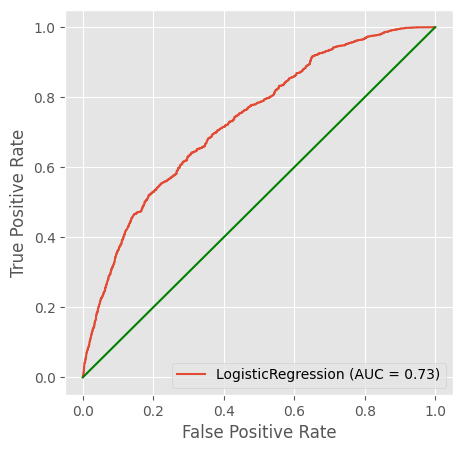

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

# create a dictionary of hyperparameters to tune
param_grid = {
    "C": [0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"]
}

# create a logistic regression model with grid search cv
grid_logistic = GridSearchCV(LogisticRegression(random_state=42), param_grid, scoring="roc_auc", n_jobs=-1,cv=10)

# fit the logistic regression model to the training data
grid_logistic.fit(X_train, y_train)

# predict on the test data
y_pred = grid_logistic.predict(X_test)
y_pred_prob = grid_logistic.predict_proba(X_test)[:,1]



# print the best hyperparameters
print("Best hyperparameters Cross Validation:", grid_logistic.best_params_)
print("Best Score Cross Validation:", grid_logistic.best_score_)

# evaluate the model on the test data
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy_logreg = accuracy_score(y_test, y_pred)
display_roc_curve(y_pred_prob,roc_auc,'LogisticRegression')
print("ROC AUC SCORE:",roc_auc)
print("Accuracy:",accuracy_logreg)

#### Method 2: Random Forest Classifier With RFE and Grid Search CV

['pipeline-1__no_of_weekend_nights' 'pipeline-1__no_of_week_nights'
 'pipeline-1__arrival_year' 'pipeline-1__arrival_month'
 'pipeline-1__arrival_date' 'pipeline-1__no_of_special_requests'
 'pipeline-1__total_guest' 'pipeline-1__total_night_booked'
 'pipeline-2__type_of_meal_plan_Meal Plan 1'
 'pipeline-2__market_segment_type_Online']
Accuracy: 0.8785225908348531
Best hyperparameters Cross Validation: {'max_depth': 15, 'n_estimators': 1000}
Best Score Cross Validation: 0.879172370240585
ROC AUC SCORE: 0.8785225908348531
Accuracy: 0.8160220994475138


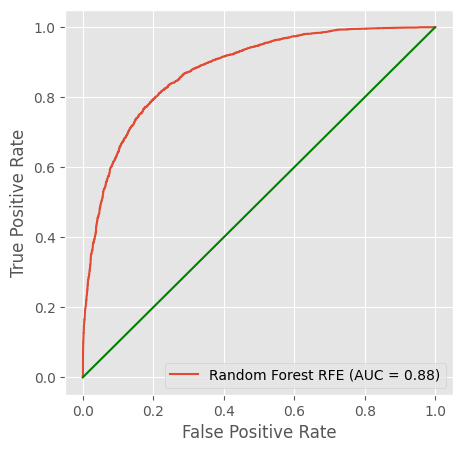

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
# Create a Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)

# Use RFE to select the top 10 features
rfe = RFE(rf, n_features_to_select=10,step=1)
rfe_select = rfe.fit(X_train, y_train)
print(preprocessor.get_feature_names_out()[rfe_select.support_])

X_train_rfe = rfe.transform(X_train)
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [25,50,100, 500, 1000],
    'max_depth': [3,5, 10, 15]
}

# Use Grid Search CV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=10,scoring="roc_auc",n_jobs=-1)
grid_search.fit(X_train_rfe, y_train)

# Use the best model to make predictions on the test data
y_pred_rf = grid_search.predict(rfe.transform(X_test))
y_pred_rf_prob = grid_search.predict_proba(rfe.transform(X_test))[:,1]


# Evaluate the model's performance
print(f'Accuracy: {grid_search.score(rfe.transform(X_test), y_test)}')

# print the best hyperparameters
print("Best hyperparameters Cross Validation:", grid_search.best_params_)
print("Best Score Cross Validation:", grid_search.best_score_)

# evaluate the model on the test data
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
display_roc_curve(y_pred_rf_prob,roc_auc_rf,'Random Forest RFE')
print("ROC AUC SCORE:",roc_auc_rf)
print("Accuracy:",accuracy_rf)

#### Method 3: Random Forest Classifier With All Features

Best hyperparameters Cross Validation: {'max_depth': 15, 'n_estimators': 1000}
Best Score Cross Validation: 0.8763085984559877
ROC AUC SCORE: 0.8740022128934206
Accuracy: 0.8132596685082873


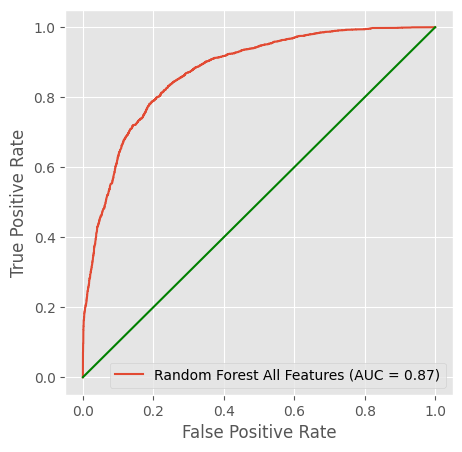

In [41]:
# Create a Random Forest Classifier model
rf = RandomForestClassifier(random_state=42)
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [25,50,100, 500, 1000],
    'max_depth': [3,5, 10, 15]
}
# Use Grid Search CV to find the best hyperparameters
grid_search_randF = GridSearchCV(rf, param_grid, cv=10,scoring="roc_auc")
grid_search_randF.fit(X_train, y_train)

# Use the best model to make predictions on the test data
y_pred_randomF = grid_search_randF.predict(X_test)
y_pred_randF_prob = grid_search_randF.predict_proba(X_test)[:,1]


# print the best hyperparameters
print("Best hyperparameters Cross Validation:", grid_search_randF.best_params_)
print("Best Score Cross Validation:", grid_search_randF.best_score_)

# evaluate the model on the test data
roc_auc_randf = roc_auc_score(y_test, y_pred_randF_prob)
accuracy_randomF = accuracy_score(y_test, y_pred_randomF)
display_roc_curve(y_pred_randF_prob,roc_auc_randf,"Random Forest All Features")
print("ROC AUC SCORE:",roc_auc_randf)
print("Accuracy:",accuracy_randomF)

Predicting booking status is a binary classification problem. I have chosen the logistic model as the baseline model because it is very efficient to train and interpret. For the comparison models, I have chosen the Random Forest classification model, as they are tree-based models that can map non-linear relationships quite well. I have used Grid Search Cross Validation to tune the hyperparameters and improve the score of the model.

The model is evaluated on the following metrics Accuracy and ROC-AUC score.

  
![metric_hotel](metric_hotel.jpg)



The **Random forest classification with RFE** has the best accuracy of **0.82**. **The Random Forest Classification Model with RFE **has the best ROC-AUC score of **0.88**. This outcome is extremely intriguing. In compared to the model that takes into account all features, the model with the 10 best features performs better.

**The top ten features selected by RFE are:**
1. no_of_weekend_nights
2. no_of_week_nights
3. arrival_year
4. arrival_month
5. arrival_date
6. no_of_special_requests
7. total_guest
8. total_night_booked
9. type_of_meal_plan
10. market_segment_type

## Which general recommendations for the hotel can you make?

1. The hotel should take more reservations with no children because the cancellation rate for those reservations is substantially lower.
2. The hotel should take reservations in which the weekend night count is lower.The more weekend nights booked, the greater the likelihood of cancellation.
3. For a single client reservation, the cancellation rate is the lowest.The hotel should give preference to a single client booking.
4. The cancellation rate is lowest in January and highest in July. The hotel can provide some offers  in the month of July to prevent cancellations.
5. Longer lead-time bookings are more likely to be canceled than shorter-lead-time ones. Those with a longer lead time should be reminded, and their availability on the date of booking should be checked.
6. The Random Forest model should be deployed to predict booking status.
7. More data should be collected so that the result is more robust.